In [ ]:
!pip install transformers

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

In [ ]:
model=VisionEncoderDecoderModel.from_pretrained('nlpconnect/vit-gpt2-image-captioning')
feature_extractor= ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer=AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length=16
num_beams=4
gen_kwargs={"max_length":max_length, "num_beams":num_beams}
def predict_step(image_paths):
  images=[]
  for image_path in image_paths:
    i_image=Image.open(image_path)
    if i_image.mode !="RGB":
      i_image=i_image.convert(mode="RGB")

    images.append(i_image)
  pixel_values=feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values=pixel_values.to(device)

  output_ids=model.generate(pixel_values, **gen_kwargs)

  preds=tokenizer.batch_decode(output_ids,skip_special_tokens=True)
  preds=[pred.strip() for pred in preds]
  return preds

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
predict_step(["/content/Bus.png"])

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a yellow school bus parked in front of a wall']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

my_drive_path="/content/drive/MyDrive/pictures"

files=os.listdir(my_drive_path)

images=[file for file in files if file.endswith((".png",".jpg"))]

print(images)

['goat.jpg', 'emoji.jpg']


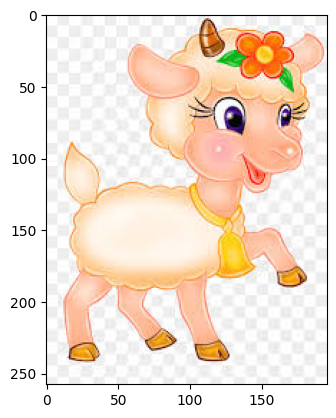

a painting of a stuffed animal on a colorful background


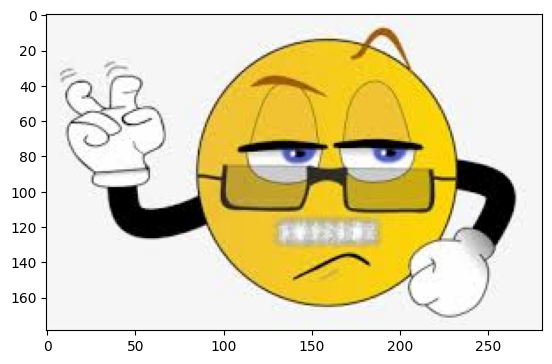

a painting of a person with a cartoon character on their head


In [ ]:
import matplotlib.pyplot as plt

my_drive_path="/content/drive/MyDrive/pictures"

img_caption={}
for image in images:
  image_path=os.path.join(my_drive_path, image)

  plt.imshow(plt.imread(image_path))
  plt.show()

  caption=predict_step([image_path])[0]
  img_caption[image_path]=caption
  print(caption)